# Loading Data

In [4]:
## Loading The Dataset using pandas
import pandas as pd
df = pd.read_csv("high-school-directory.csv")

# Exploring The Data

In [5]:
## First rows of the dataframe
df.head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Council District,Census Tract,BIN,BBL,NTA,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,12420.0,20,4,19,12


In [6]:
## Data types & non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 69 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   dbn                               435 non-null    object 
 1   school_name                       435 non-null    object 
 2   borough                           435 non-null    object 
 3   building_code                     435 non-null    object 
 4   phone_number                      435 non-null    object 
 5   fax_number                        423 non-null    object 
 6   grade_span_min                    432 non-null    float64
 7   grade_span_max                    435 non-null    int64  
 8   expgrade_span_min                 31 non-null     float64
 9   expgrade_span_max                 33 non-null     float64
 10  bus                               434 non-null    object 
 11  subway                            358 non-null    object 
 12  primary_

In [7]:
## summary statistics for numerical columns
df.describe()

,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,postcode,total_students,number_programs,Community Board,Council District,Census Tract,BIN,BBL,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
count,432.000000,435.000000,31.000000,33.000000,435.000000,426.000000,435.000000,432.000000,432.000000,432.000000,4.310000e+02,4.310000e+02,434.000000,435.000000,435.000000,435.000000,435.000000
mean,8.442130,11.894253,8.516129,12.363636,10726.096552,703.842723,1.708046,6.787037,21.856481,3988.340278,2.581724e+06,2.510921e+09,14232.228111,38.372414,3.452874,28.832184,36.949425
std,1.164591,0.421583,1.121635,0.783349,537.927907,775.870436,1.564233,4.367781,14.321718,15582.415491,1.189750e+06,1.136455e+09,3529.272774,19.345374,1.212249,14.209488,21.107520
min,6.000000,9.000000,6.000000,12.000000,10001.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000811e+06,1.000160e+09,10090.000000,1.000000,1.000000,1.000000,1.000000
25%,9.000000,12.000000,9.000000,12.000000,10301.500000,349.000000,1.000000,3.000000,10.000000,118.000000,2.000992e+06,2.023060e+09,11606.000000,22.000000,2.000000,17.000000,23.000000
50%,9.000000,12.000000,9.000000,12.000000,10472.000000,460.500000,1.000000,6.000000,18.000000,251.500000,2.116159e+06,2.053680e+09,13093.000000,39.000000,4.000000,32.000000,34.000000
75%,9.000000,12.000000,9.000000,12.000000,11217.000000,622.000000,2.000000,10.000000,34.000000,510.250000,3.330710e+06,3.068830e+09,16865.750000,53.500000,5.000000,40.000000,54.000000
max,9.000000,12.000000,9.000000,14.000000,11694.000000,5458.000000,10.000000,18.000000,51.000000,138501.000000,5.149609e+06,5.066130e+09,24669.000000,71.000000,5.000000,51.000000,77.000000


In [8]:
##make lowercase
##replace spaces with "_"
##remove special characters

df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ", "_")

## confirm changes
print (df.columns)

Index(['dbn', 'school_name', 'borough', 'building_code', 'phone_number',
       'fax_number', 'grade_span_min', 'grade_span_max', 'expgrade_span_min',
       'expgrade_span_max', 'bus', 'subway', 'primary_address_line_1', 'city',
       'state_code', 'postcode', 'website', 'total_students', 'campus_name',
       'school_type', 'overview_paragraph', 'program_highlights',
       'language_classes', 'advancedplacement_courses', 'online_ap_courses',
       'online_language_courses', 'extracurricular_activities',
       'psal_sports_boys', 'psal_sports_girls', 'psal_sports_coed',
       'school_sports', 'partner_cbo', 'partner_hospital', 'partner_highered',
       'partner_cultural', 'partner_nonprofit', 'partner_corporate',
       'partner_financial', 'partner_other', 'addtl_info1', 'addtl_info2',
       'start_time', 'end_time', 'se_services', 'ell_programs',
       'school_accessibility_description', 'number_programs', 'priority01',
       'priority02', 'priority03', 'priority04', 'prior

# Filtering The Data

In [9]:
## Filter the dataset to include only schools located in Brooklyn
df_brooklyn = df[df['borough'] == 'Brooklyn']
##check the first few rows of the filtered dataframe
print(df_brooklyn.head())

       dbn                                        school_name   borough  \
1   21K559        Life Academy High School for Film and Music  Brooklyn   
2   16K393     Frederick Douglass Academy IV Secondary School  Brooklyn   
7   17K122  Pathways in Technology Early College High Scho...  Brooklyn   
10  23K644                     Eagle Academy for Young Men II  Brooklyn   
12  15K462                           Secondary School for Law  Brooklyn   

   building_code  phone_number    fax_number  grade_span_min  grade_span_max  \
1           K400  718-333-7750  718-333-7775             9.0              12   
2           K026  718-574-2820  718-574-2821             9.0              12   
7           K625  718-221-1593  718-221-1781             9.0              12   
10          K271  718-495-0863  718-732-2129             6.0              12   
12          K460  718-832-4250  718-499-3947             9.0              12   

    expgrade_span_min  expgrade_span_max  ... council_district censu

# Q & A


How many total schools are in Brooklyn?

In [10]:
## Number of schools in Brooklyn
df_brooklyn['dbn'].nunique()

121

How many schools in Brooklyn offer Grade 9 entry? (here you need to use range to get the correct answer for example just stating min_grade entry >=9 will miss the schools that offer earlier entry)


In [11]:
grade_9_filter = (df_brooklyn["grade_span_min"] <= 9) & (df_brooklyn["grade_span_max"] >= 9)
brooklyn_grade9_count = df_brooklyn.loc[grade_9_filter, "dbn"].nunique()
print("Brooklyn schools offering Grade 9 entry:", brooklyn_grade9_count)

Brooklyn schools offering Grade 9 entry: 121


Count of schools per borough

In [12]:
df.groupby("borough")["dbn"].agg("nunique")

borough
Bronx            118
Brooklyn         121
Manhattan        106
Queens            80
Staten Island     10
Name: dbn, dtype: int64

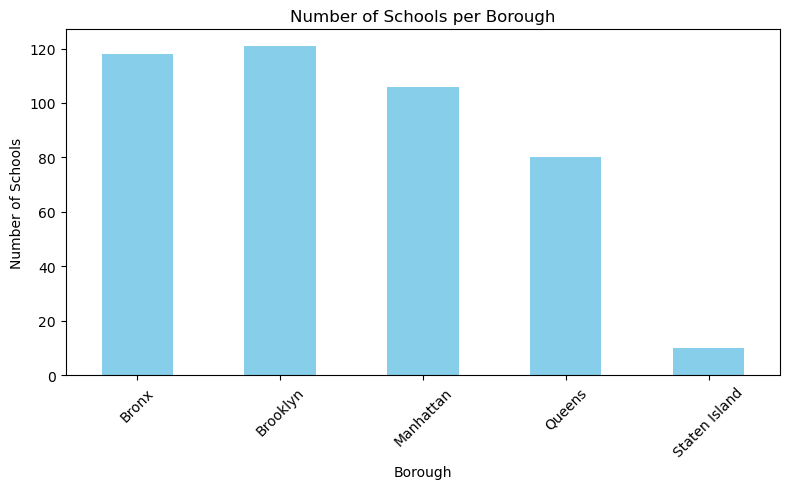

In [13]:
import matplotlib.pyplot as plt
# Bar chart for number of schools per borough name
school_counts = df.groupby("borough")["dbn"].nunique()
school_counts.plot(kind='bar', figsize=(8,5), color='skyblue')
plt.title('Number of Schools per Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Schools')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Average number of students per borough

In [14]:
df.groupby("borough")["total_students"].mean()

borough
Bronx             490.406780
Brooklyn          699.134454
Manhattan         589.825243
Queens           1046.644737
Staten Island    1847.500000
Name: total_students, dtype: float64

Summary of grade_span_max grouped by borough

In [15]:
# Summary of grade_span_max
df['grade_span_max'].describe()


count    435.000000
mean      11.894253
std        0.421583
min        9.000000
25%       12.000000
50%       12.000000
75%       12.000000
max       12.000000
Name: grade_span_max, dtype: float64

# Findings

- Brooklyn has the highest number of incidents, however, it also has the highest number of schools.
- Most of the classes offered in are for 12th grade.